# Exercise 18

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

## a)

In [2]:
df = pd.read_csv('temperatures_dortmund.csv')
df

,Date,Time,Measurement,Temperature
0,01.01.2000,00:00,2000.000000,3.0
1,01.01.2000,00:15,2000.000028,3.0
2,01.01.2000,00:30,2000.000057,3.0
3,01.01.2000,00:45,2000.000085,3.0
4,01.01.2000,01:00,2000.000114,3.0
...,...,...,...,...
307885,31.12.2008,23:10,2008.999905,-4.0
307886,31.12.2008,23:20,2008.999924,-3.0
307887,31.12.2008,23:30,2008.999943,-3.0
307888,31.12.2008,23:40,2008.999962,-4.0


Fourier Analyse ist nicht möglich, da die Messdaten nicht äquidistant genommen wurden. Lomb-Scargle ist jedoch anwendbar.

## b)
Vorbereiten des Datensatzes

In [3]:
#df['Temperature'].isnull().values.any()

df = df.dropna() # drop all NaN entries
df = df[df.Measurement < 2009] # some entries have comma at wrong place, causing time > 2009

#df['Temperature'].isnull().values.any()

#df

Anwenden von lomb scargle

In [17]:
from scipy.signal import lombscargle

data = df.to_numpy()

temp = data[:,3]
time = data[:,2]

n_frequencies = 1000
f = np.linspace(1/(4*365), 9, n_frequencies) # anfang der Frequenzen: ein viertel Tag

pgram = lombscargle(time, temp, f, normalize=True)

(0.0, 9.0)

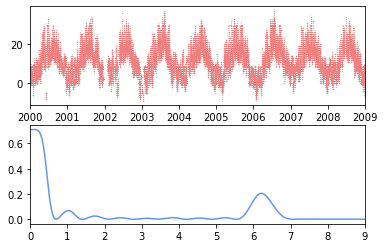

In [18]:
fig, ax = plt.subplots(2,1)

ax[0].plot(time, temp, marker = ".", ms = 0.1, lw = 0, c = "lightcoral")
ax[0].set_xlim(2000, 2009)

ax[1].plot(f, pgram, c = "cornflowerblue")
ax[1].set_xlim(0, 9)